# Learning Lazily with K-Nearest Neighbor

## Predicting after observing neighbors

In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits()
train = range(0, 1700)
test = range(1700, len(digits.data))
pca = PCA(n_components = 25)
pca.fit(digits.data[train])
X = pca.transform(digits.data[train]) 
y = digits.target[train]
tX = pca.transform(digits.data[test]) 
ty = digits.target[test]

In [2]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=5, p=2,
                           metric='euclidean')
kNN.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [3]:
print('Accuracy: %.3f' % kNN.score(tX,ty) )
print('Prediction: %s Actual: %s' 
      % (kNN.predict(tX[-15:,:]),ty[-15:]))

Accuracy: 0.990
Prediction: [2 2 5 7 9 5 4 8 1 4 9 0 8 9 8] Actual: [2 2 5 7 9 5 4 8 8 4 9 0 8 9 8]


## Choosing the k parameter wisely

In [4]:
for k in [1, 5, 10, 50, 100, 200]:
    kNN = KNeighborsClassifier(n_neighbors=k, p=2,
                               metric='euclidean')
    kNN.fit(X, y)
    print('for k = %3i accuracy is %.3f'
          % (k, kNN.score(tX, ty)))

for k =   1 accuracy is 0.979
for k =   5 accuracy is 0.990
for k =  10 accuracy is 0.969
for k =  50 accuracy is 0.959
for k = 100 accuracy is 0.959
for k = 200 accuracy is 0.907


# Leveraging the Correct k Parameter

## Experimenting with a flexible algorithm 

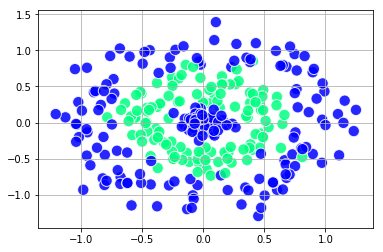

In [5]:
import numpy as np
from sklearn.datasets import make_circles, make_blobs
strange_data  = make_circles(n_samples=500, shuffle=True, 
                             noise=0.15, random_state=101,
                             factor=0.5)
center = make_blobs(n_samples=100, n_features=2,
                    centers=1, cluster_std=0.1,
                    center_box=(0, 0))
first_half    = np.row_stack((strange_data[0][:250,:],
                center[0][:50,:]))
first_labels  = np.append(strange_data[1][:250],
                np.array([0]*50))
second_half   = np.row_stack((strange_data[0][250:,:],
                center[0][50:,:]))
second_labels = np.append(strange_data[1][250:],
                np.array([0]*50))

%matplotlib inline 
import matplotlib.pyplot as plt
plt.scatter(first_half[:,0], first_half[:,1], s=2**7, 
    c=first_labels, edgecolors='white', 
            alpha=0.85, cmap='winter')
plt.grid() # adds a grid
plt.show() # Showing the result 

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for metric in ['euclidean', 'manhattan', 'chebyshev']:
    kNN = KNeighborsClassifier(n_neighbors=3,
                               weights='uniform',
                               algorithm='auto',
                               metric=metric)
    kNN.fit(first_half,first_labels)
    score = accuracy_score(y_true=second_labels, 
                          y_pred=kNN.predict(second_half))
    print ("%(metric)s learning accuracy\
    score:%(value)0.3f" % 
           {'metric':metric, 'value':score})

euclidean learning accuracy    score:0.933
manhattan learning accuracy    score:0.930
chebyshev learning accuracy    score:0.937


# Implementing KNN Regression

In [7]:
hours = np.array(range(0,9)).reshape(-1, 1)
print(hours)
answers = (25, 33, 41, 53, 59, 70, 78, 86, 98)
interrupt = (0, -1, -3, -4, -5, -7, -8, -9, -11)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]


In [8]:
features = list(zip(answers, interrupt))
print(features)

[(25, 0), (33, -1), (41, -3), (53, -4), (59, -5), (70, -7), (78, -8), (86, -9), (98, -11)]


In [9]:
from sklearn.neighbors import KNeighborsRegressor

gradeModel = KNeighborsRegressor(n_neighbors=2)
gradeModel.fit(hours, features)

prediction = gradeModel.predict([[6]])
print(prediction)

correct = prediction[0][0] + prediction[0][1]
print('You will answer {0} questions correctly.'.format(
    correct))

[[74.  -7.5]]
You will answer 66.5 questions correctly.


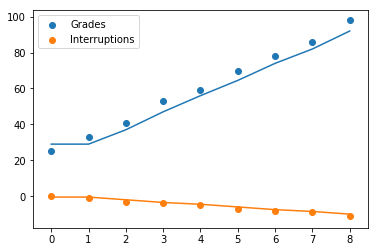

In [10]:
plt.scatter(hours, answers)
plt.scatter(hours, interrupt)
plt.legend(['Grades', 'Interruptions'])

studyData_pred = gradeModel.predict(hours)
plt.plot(hours, studyData_pred)
plt.show()

# Implementing KNN Classification

In [11]:
road = ['Dry', 'Dry', 'Dry', 'Damp', 'Damp', 'Damp', 
        'Flooded', 'Flooded', 'Flooded']
weather = ['Sunny', 'Cloudy', 'Raining', 'Sunny', 
           'Cloudy', 'Raining', 'Sunny', 'Cloudy', 
           'Raining']
drive = ['Yes', 'Yes', 'Yes', 'Yes', 'Maybe', 'No', 'No', 
         'No', 'No']

In [12]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

roadEnc = encoder.fit_transform(road)
print(roadEnc)
weatherEnc = encoder.fit_transform(weather)
print(weatherEnc)
driveEnc = encoder.fit_transform(drive)
print(driveEnc)

[1 1 1 0 0 0 2 2 2]
[2 0 1 2 0 1 2 0 1]
[2 2 2 2 0 1 1 1 1]


In [13]:
features = list(zip(roadEnc, weatherEnc))
print(features)

[(1, 2), (1, 0), (1, 1), (0, 2), (0, 0), (0, 1), (2, 2), (2, 0), (2, 1)]


In [14]:
answers = ['Maybe', 'No', 'Yes']

driveModel = KNeighborsClassifier(n_neighbors=3, 
                                  metric='manhattan')
driveModel.fit(features, driveEnc)

prediction = driveModel.predict([[0, 0]])
print('Should I drive? {0}'.format(
    answers[prediction[0]]))

Should I drive? Maybe
